In [1]:
# varBC time series 
# read compiled varbc stats from 
# <sensor>_<sat>_<ch>_{angle, chloud, emissivity, cloud, global_offset, obs_num, total_bc}
# initial built: 2024/08/05
# modified: 2024/09/25
# modified: 2025/09/10 -- for gaea use (also clean up the code)

# Update 2025/01/08:
# This script has been transformed into py file
# located at 
# /scratch2/GFDL/gfdlscr/Chih-Chi.Hu/varbc_coeff/plot_varbc_timeseries/*driver and *temp.py

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
root     = '/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/varbc_coeff/compiled_stats'
fig_root = '/gpfs/f6/bil-coastal-gfdl/scratch/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/'

save_figure = False

# the channel to plot:
#sensor='amsua_n15'
sensor='amsua_n19'
#sensor='atms_n20'
chanl ='ch1'

# experiments to compare:
exps = ['full_CTRL', 'full_CTRL_noinf']
expref = 'full_CTRL' # reference exp

#exps = ['full_CTRL', 'full_only_clr_clr', 'full_clr_clr_and_cld_cld_0.05']

#exps = ['full_CTRL', 'full_clr_clr_and_cld_cld_0.05' ,
#        'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc',
#        'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_clwnbc']

#exps = ['full_CTRL', 'full_CTRL_noinf']

#exps=['full_clr_clr_and_cld_cld_0.05', 'full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld_clwnbc', \
#      'full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld_tri_clwnbc']

#exps = ['full_CTRL', 'full_clr_clr_and_cld_cld_0.05','full_only_clr_clr']

expstr = '-'.join(exps)

# the short name used in the paper:
expshort = {'full_CTRL'      : 'CTRL',
            'full_CTRL_noinf': 'NOINF',
            'full_clr_cld'   : 'CLR-CLD',
            'full_only_clr'  : 'CLR',
            'full_sym_tri'   : 'CLR-CLD_SYM',
#            'full_sym_tri'   : 'TENT_NOBC',
            'full_sym_clwnbc': 'POLY_NOBC',
            'full_sym_bc'    : 'POLY_BC',
            'full_low_sym_tri': 'CLR-CLD_SYM_LOW',
            'full_CTRL_low_sym': 'CTRL_SYM_LOW'}

# the color used in the paper
expcolor = {'full_CTRL': 'black',
            'full_CTRL_noinf': 'blue',
            'full_only_clr': 'gray',
            'full_clr_cld' : 'blue',
            'full_sym_tri' : 'green',
            'full_low_sym_tri':  'orange',
            'full_CTRL_low_sym': 'olive',
            'full_sym_bc':       'brown',
            'full_sym_clwnbc':   'purple'  }

fn_global_offset={};
fn_total_bc={};
fn_emiss={};
fn_cloud={};
fn_varbc_norminc={};
fn_obs_num={};

for exp in exps:
    fn_dir = f'{root}/{exp}/'
    fn_prefix = f'{sensor}_{chanl}'
    
    fn_global_offset[exp] = f'{fn_dir}/{fn_prefix}_global_offset'
    fn_total_bc[exp]      = f'{fn_dir}/{fn_prefix}_total_bc'
    fn_emiss[exp]         = f'{fn_dir}/{fn_prefix}_emissivity'
    fn_cloud[exp]         = f'{fn_dir}/{fn_prefix}_cloud'
    fn_varbc_norminc[exp] = f'{fn_dir}/{fn_prefix}_varbc_norminc'
    fn_obs_num[exp]       = f'{fn_dir}/{fn_prefix}_obs_num'

In [3]:
# read timeseries
datetime=[];

total_bc_inc={};
total_bc_inc_sea={};
total_bc_inc_land={};

global_offset={};

emiss_inc={};
emiss_inc_sea={};
emiss_inc_land={};

varbc_norminc={};
varbc_norminc_sea={};
varbc_norminc_land={};

obs_num_total={};
obs_num_varbc={};

for i, exp in enumerate(exps):
    
    total_bc_inc[exp]     = [];
    total_bc_inc_sea[exp] = [];
    total_bc_inc_land[exp] = [];
    
    global_offset[exp]    = [];

    emiss_inc[exp]     = [];
    emiss_inc_sea[exp] = [];
    emiss_inc_land[exp] = [];
    
    varbc_norminc[exp]     = [];
    varbc_norminc_sea[exp] = [];
    varbc_norminc_land[exp]= [];
    
    obs_num_total[exp]    = [];
    obs_num_varbc[exp]    = [];
    
    # read total_bc_inc:
    with open(fn_total_bc[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            if i==0:
                datetime.append(parts[0])
            
            total_bc_inc[exp].append(float(parts[3]))
            total_bc_inc_sea[exp].append(float(parts[4]))
            total_bc_inc_land[exp].append(float(parts[5]))
            
    # read global_offset
    with open(fn_global_offset[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            global_offset[exp].append(float(parts[3]))    
            
    # read emissivity increment:
    with open(fn_emiss[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            emiss_inc[exp].append(float(parts[3]))
            emiss_inc_sea[exp].append(float(parts[4]))
            emiss_inc_land[exp].append(float(parts[5]))
    
    # read varbc normalized increment:
    with open(fn_varbc_norminc[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            varbc_norminc[exp].append(float(parts[3]))
            varbc_norminc_sea[exp].append(float(parts[4]))
            varbc_norminc_land[exp].append(float(parts[5]))
     
    # read total obs num and varbc input number:
    with open(fn_obs_num[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            obs_num_total[exp].append(float(parts[3])) 
            obs_num_varbc[exp].append(float(parts[4])) 
    
nt = len(datetime)

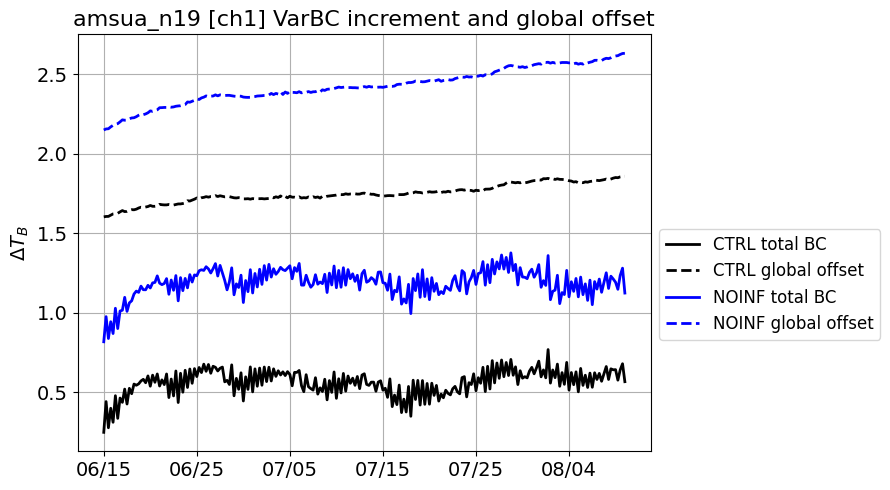

In [4]:
# Plot several exps' total BC & global offset

exp_list=exps
exp_list_short = [expshort[exp] for exp in exp_list]

#save_figure=False
fig_dir=f'{fig_root}/total_inc_and_global_offset_timeseries/{expstr}/{sensor}'

if save_figure:
    os.makedirs(fig_dir, exist_ok=True)
    print(f"Directory '{fig_dir}' created.")


plt_legend=True

fig, ax = plt.subplots(figsize=(9,5))

for e, exp in enumerate(exp_list):
    ax.plot(datetime[20:nt], total_bc_inc[exp][20:nt],  linestyle='-', label=f'{expshort[exp]} total BC', color=expcolor[exp], linewidth=2)
    ax.plot(datetime[20:nt], global_offset[exp][20:nt], linestyle='--',  label=f'{expshort[exp]} global offset',color=expcolor[exp], linewidth=2)

interval = 40
ticks_to_show = datetime[20::interval]

if plt_legend: 
    ax.legend(loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=10.5)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
#ax.set_xticklabels(ticks_labels, rotation=0, ha='right',fontsize=12)
ymin = plt.gca().get_ylim()[0]*1.35
ymax = plt.gca().get_ylim()[1]*1.35

'''
if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)
'''

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta T_B$',fontsize=14)
ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] VarBC increment and global offset',fontsize=16)
plt.tight_layout()

if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/total_inc_and_global_offset_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/total_inc_and_global_offset_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}.png")

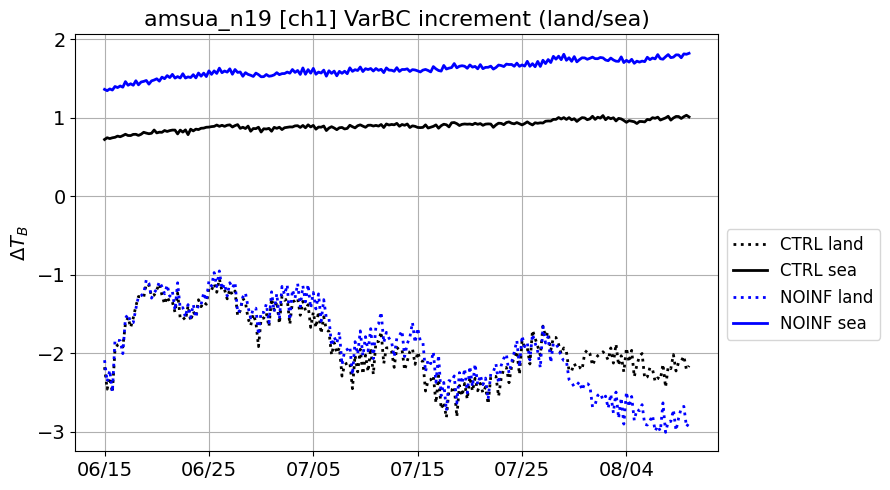

In [5]:
# Plot total BC over ocean/land

exp_list=exps
exp_list_short = [expshort[exp] for exp in exp_list]

#save_figure=False
fig_dir=f'{fig_root}/total_inc_landsea/{expstr}/{sensor}'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


plt_legend=True

fig, ax = plt.subplots(figsize=(9,5))

for e, exp in enumerate(exp_list):
    ax.plot(datetime[20:nt], total_bc_inc_land[exp][20:nt],  linestyle=':', label=f'{expshort[exp]} land', color=expcolor[exp], linewidth=2)
    ax.plot(datetime[20:nt], total_bc_inc_sea[exp][20:nt],  linestyle='-', label=f'{expshort[exp]} sea', color=expcolor[exp], linewidth=2)

interval = 40
ticks_to_show = datetime[20::interval]

if plt_legend: 
    ax.legend(loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=10.5)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
#ax.set_xticklabels(ticks_labels, rotation=0, ha='right',fontsize=12)
ymin = plt.gca().get_ylim()[0]*1.35
ymax = plt.gca().get_ylim()[1]*1.35

'''
if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)
'''

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta T_B$',fontsize=14)
ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] VarBC increment (land/sea)',fontsize=16)

plt.tight_layout()
if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/total_inc_landsea_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/total_inc_landsea_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}.png")

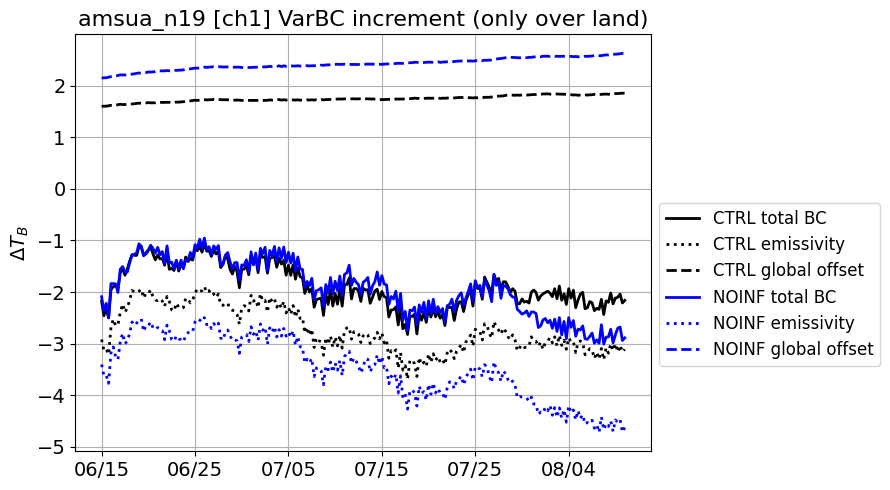

In [6]:
# Plot several exps' total BC, global offset, emissivity over land

exp_list=exps
exp_list_short = [expshort[exp] for exp in exp_list]

#save_figure=False
fig_dir=f'{fig_root}/inc_analysis_land/{expstr}/{sensor}'

if save_figure:
    os.makedirs(fig_dir, exist_ok=True)
    print(f"Directory '{fig_dir}' created.")


plt_legend=True

fig, ax = plt.subplots(figsize=(9,5))

for e, exp in enumerate(exp_list):
    ax.plot(datetime[20:nt], total_bc_inc_land[exp][20:nt],  linestyle='-', label=f'{expshort[exp]} total BC', color=expcolor[exp], linewidth=2)
    ax.plot(datetime[20:nt], emiss_inc_land[exp][20:nt],  linestyle=':', label=f'{expshort[exp]} emissivity', color=expcolor[exp], linewidth=2)
    ax.plot(datetime[20:nt], global_offset[exp][20:nt],  linestyle='--', label=f'{expshort[exp]} global offset', color=expcolor[exp], linewidth=2)

interval = 40
ticks_to_show = datetime[20::interval]

if plt_legend: 
    ax.legend(loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=10.5)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
#ax.set_xticklabels(ticks_labels, rotation=0, ha='right',fontsize=12)
ymin = plt.gca().get_ylim()[0]*1.35
ymax = plt.gca().get_ylim()[1]*1.35

'''
if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)
'''

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta T_B$',fontsize=14)
ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] VarBC increment (only over land)',fontsize=16)

plt.tight_layout()
if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/total_globaloffset_emissivity_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/total_globaloffset_emissivity_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}.png")

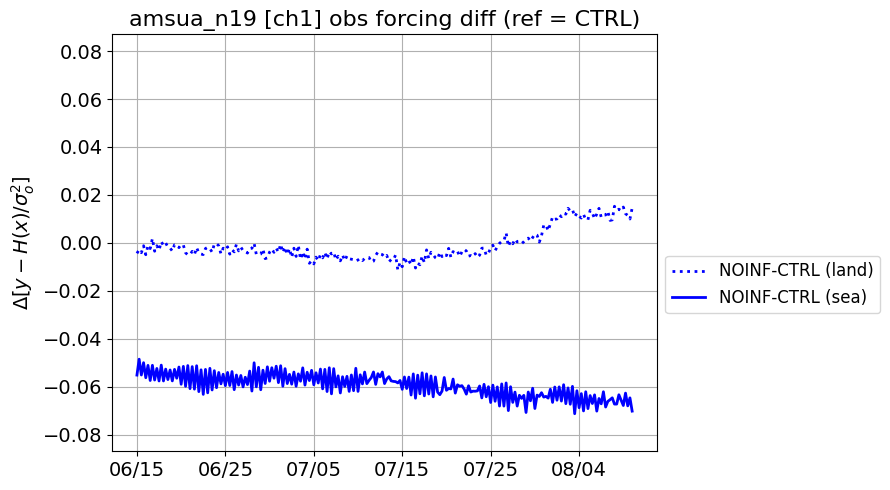

In [7]:
# Compare the difference of obs forcing (sea vs land)

#expref = 'full_CTRL'
exp_list=[exp for exp in exps if exp!= expref]
exp_list_short = [expshort[exp] for exp in exp_list]

#save_figure=False
fig_dir=f'{fig_root}/obs_forcing/{expstr}/{sensor}'

if save_figure:
    os.makedirs(fig_dir, exist_ok=True)
    print(f"Directory '{fig_dir}' created.")


plt_legend=True

fig, ax = plt.subplots(figsize=(9,5))

for e, exp in enumerate(exp_list):

    #ax.plot(datetime[:nt], -(np.array(varbc_norminc[exp][:nt])      - np.array(varbc_norminc[expref][:nt])),  linestyle='-', label=f'{short_name[exp]} norm inc (global)', color=plt_color, linewidth=2)
    ax.plot(datetime[20:nt], -(np.array(varbc_norminc_land[exp][20:nt]) - np.array(varbc_norminc_land[expref][20:nt])), linestyle=':',  label=f'{expshort[exp]}-{expshort[expref]} (land)',color=expcolor[exp], linewidth=2)
    ax.plot(datetime[20:nt], -(np.array(varbc_norminc_sea[exp][20:nt])  - np.array(varbc_norminc_sea[expref][20:nt])), linestyle='-',  label=f'{expshort[exp]}-{expshort[expref]} (sea)',color=expcolor[exp], linewidth=2)

interval = 40
ticks_to_show = datetime[20::interval]

if plt_legend: 
    ax.legend(loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=10.5)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
#ax.set_xticklabels(ticks_labels, rotation=0, ha='right',fontsize=12)
ymin = plt.gca().get_ylim()[0]*1.15
ymax = plt.gca().get_ylim()[1]*1.15
yrange = max(abs(ymin), abs(ymax))
ax.set_ylim(-yrange, yrange)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta [y-H(x)/\sigma_o^2]$',fontsize=14)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] obs forcing diff (ref = {expshort[expref]})',fontsize=16)

plt.tight_layout()
if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/del_obs_forcing_timeseries_{'-'.join(exp_list_short)}-ref_{expshort[expref]}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/del_obs_forcing_timeseries_{'-'.join(exp_list_short)}-ref_{expshort[expref]}_{sensor}_{chanl}.png")

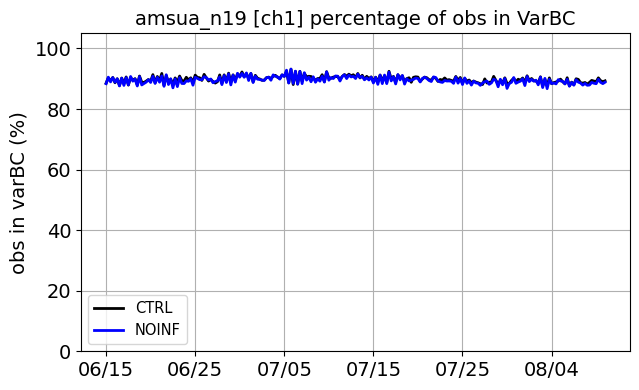

In [8]:
# Plot several exps' varbc obs percentage

exp_list = exps
exp_list_short = [expshort[exp] for exp in exp_list]

plt_legend=True
#save_figure=False
fig_dir=f'{fig_root}/percentage_obs_in_varbc/{expstr}/{sensor}'

if save_figure:
    os.makedirs(fig_dir, exist_ok=True)
    print(f"Directory '{fig_dir}' created.")

ylim_low= 0

fig, ax = plt.subplots(figsize=(6.5,4))

for e, exp in enumerate(exp_list):   
    varbc_percentage=np.array(obs_num_varbc[exp][20:nt]) / np.array(obs_num_total[exp][20:nt])*100
    ax.plot(datetime[20:nt], varbc_percentage, linestyle='-', color=expcolor[exp], linewidth=2, label=f'{expshort[exp]}')

interval = 40
ticks_to_show = datetime[20::interval]
ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('obs in varBC (%)',fontsize=14)
ax.set_ylim(ylim_low,105)

if plt_legend: 
#    ax.legend(loc='best', fontsize=10.5, ncol=1, bbox_to_anchor=(1, 0.4))
    ax.legend(loc='best', fontsize=10.5, ncol=1)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] percentage of obs in VarBC',fontsize=14)

plt.tight_layout()

if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/percentage_obs_in_varbc_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/percentage_obs_in_varbc_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}.png")

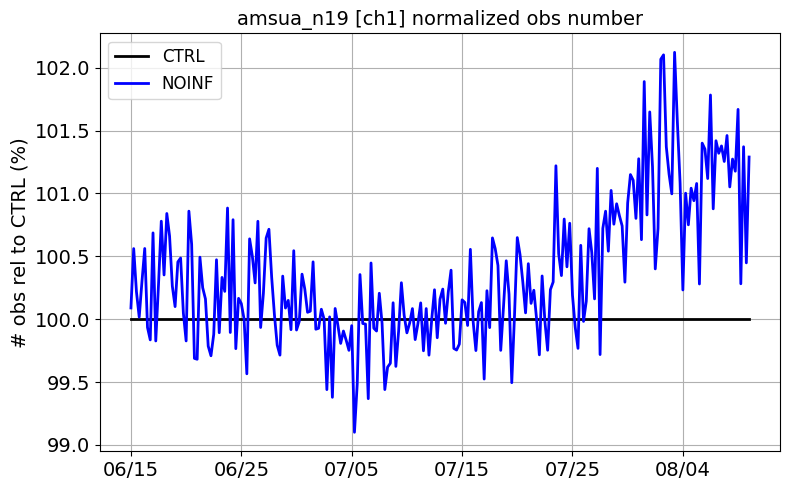

In [9]:
# PLot the relative obs num:

#expref='full_CTRL'
expnorm_list = exps

exp_list_short = [expshort[exp] for exp in expnorm_list]

plt_legend=True
#save_figure=False
fig_dir=f'{fig_root}/norm_obs/{expstr}/{sensor}'

if save_figure:
    os.makedirs(fig_dir, exist_ok=True)
    print(f"Directory '{fig_dir}' created.")
    
fig, ax = plt.subplots(figsize=(8,5))

obs_num_norm = {};
for e, exp in enumerate(expnorm_list):      
    obs_num_norm[exp] = np.array(obs_num_total[exp][20:nt]) / np.array(obs_num_total[expref][20:nt])*100
    ax.plot(datetime[20:nt], obs_num_norm[exp], linewidth=2, color=expcolor[exp], label=f'{expshort[exp]}')

if plt_legend: 
    #ax.legend(loc='best', bbox_to_anchor=(1, 0.4))
    ax.legend(loc='best',fontsize=12)

ax.grid(True)
interval = 40
ticks_to_show = datetime[20::interval]
ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(f'# obs rel to {expshort[expref]} (%)',fontsize=14)
ax.set_title(f'{sensor} [{chanl}] normalized obs number',fontsize=14)

plt.tight_layout()

if save_figure:
    plt.savefig(f"{fig_dir}/norm_obs_num_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
